In [50]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import datetime as datetime
import chart_studio.plotly as py

In [55]:
table_file = '../datos/tablas_procesadas/tabla_completa.tsv'
df = pd.read_csv(table_file,
                     sep='\t',
                     parse_dates=['fecha_inicio_sintomas', 'fecha_llegada_mx', 'fecha_caso_nuevo'])
    

In [56]:
df['fecha_caso_nuevo'] = df['fecha_caso_nuevo'].replace(pd.NaT, datetime.datetime(2020,3,15))
df['count'] = len(df) * [1]
df = df[['estado', 'procedencia', 'fecha_caso_nuevo', 'count']]

In [57]:
df

,estado,procedencia,fecha_caso_nuevo,count
0,Ciudad de México,Italia,2020-03-15,1
1,Sinaloa,Italia,2020-03-15,1
2,Ciudad de México,Italia,2020-03-15,1
3,Coahuila,Italia,2020-03-15,1
4,Chiapas,Italia,2020-03-15,1
...,...,...,...,...
992,México,Contacto,2020-03-29,1
993,Oaxaca,Contacto,2020-03-29,1
994,Oaxaca,Estados Unidos,2020-03-29,1
995,Baja California Sur,España,2020-03-29,1


In [58]:
df2 = df.groupby(['fecha_caso_nuevo']).sum().reset_index()

In [59]:
df2['count_cumulativo'] = df2['count'].cumsum()

In [60]:
df2

,fecha_caso_nuevo,count,count_cumulativo
0,2020-03-15,52,52
1,2020-03-16,30,82
2,2020-03-17,11,93
3,2020-03-18,25,118
4,2020-03-19,46,164
5,2020-03-20,39,203
6,2020-03-21,48,251
7,2020-03-22,65,316
8,2020-03-23,51,367
9,2020-03-24,38,405


In [61]:
recent_day = sorted(df['fecha_caso_nuevo'].value_counts().index)[-1].strftime('%Y-%m-%d')

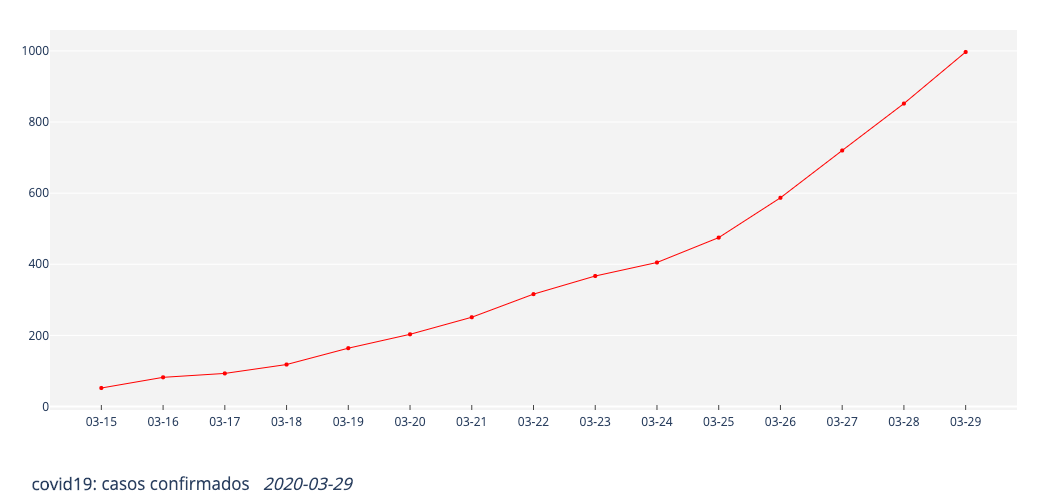

In [78]:
fig = go.Figure()

fig.add_trace(go.Scatter(
        x=df2['fecha_caso_nuevo'],
        y=df2['count_cumulativo'],
        mode='lines+markers',
        marker=dict(color='rgb(255, 0, 0)',
                    size=4),
        line=dict(width=1)))

fig.update_layout(title={'text': '<b>covid19</b>: casos confirmados   <i>{}</i>'.format(recent_day),
                         'x': 0.03,
                         'y': 0.02},
                  width=1000,
                  height=500,
                  margin={"r":30,"t":30,"l":50,"b":90},
                  autosize=False,
                  plot_bgcolor='rgb(243, 243, 243)',
                  xaxis=dict(showline=True,
                             showgrid=False,
                             linewidth=2,
                             type='date',
                             autorange=True,
                             dtick='2000-01-01',
                             tickformat='%m-%d',
                             ticks='inside',
                             ticklen=5),
                  yaxis=dict(autorange=True)
                 )
fig.show()

In [79]:
plotly_url = py.plot(fig, filename = '20200329_growth', auto_open=True)

In [149]:
df2.to_csv('../datos/tablas_procesadas/20200329_acumulados-nacional.tsv',
           sep='\t',
           index=None)

## Por estado

In [88]:
df3_cum = df.groupby(['estado', 'fecha_caso_nuevo']).sum().groupby(level=[0]).cumsum().reset_index()

In [96]:
df3_cum

,estado,fecha_caso_nuevo,count
0,Aguascalientes,2020-03-15,1
1,Aguascalientes,2020-03-19,4
2,Aguascalientes,2020-03-23,6
3,Aguascalientes,2020-03-25,12
4,Aguascalientes,2020-03-26,13
...,...,...,...
233,Zacatecas,2020-03-21,1
234,Zacatecas,2020-03-22,2
235,Zacatecas,2020-03-23,3
236,Zacatecas,2020-03-26,4


In [92]:
df3_cum[df3_cum['estado'] == 'Ciudad de México']

,estado,fecha_caso_nuevo,count
34,Ciudad de México,2020-03-15,18
35,Ciudad de México,2020-03-16,21
36,Ciudad de México,2020-03-18,24
37,Ciudad de México,2020-03-19,31
38,Ciudad de México,2020-03-21,45
39,Ciudad de México,2020-03-22,56
40,Ciudad de México,2020-03-23,60
41,Ciudad de México,2020-03-24,66
42,Ciudad de México,2020-03-25,82
43,Ciudad de México,2020-03-26,83


In [ ]:
fig.data[0].update(mode='markers+lines')
fig

In [99]:
import plotly.express as px

In [132]:
top_d3_cum = df3_cum[df3_cum['fecha_caso_nuevo'] == recent_day].sort_values(by='count', ascending=False).head(5)

In [133]:
plottop = df3_cum[df3_cum['estado'].isin(top_d3_cum['estado'])]

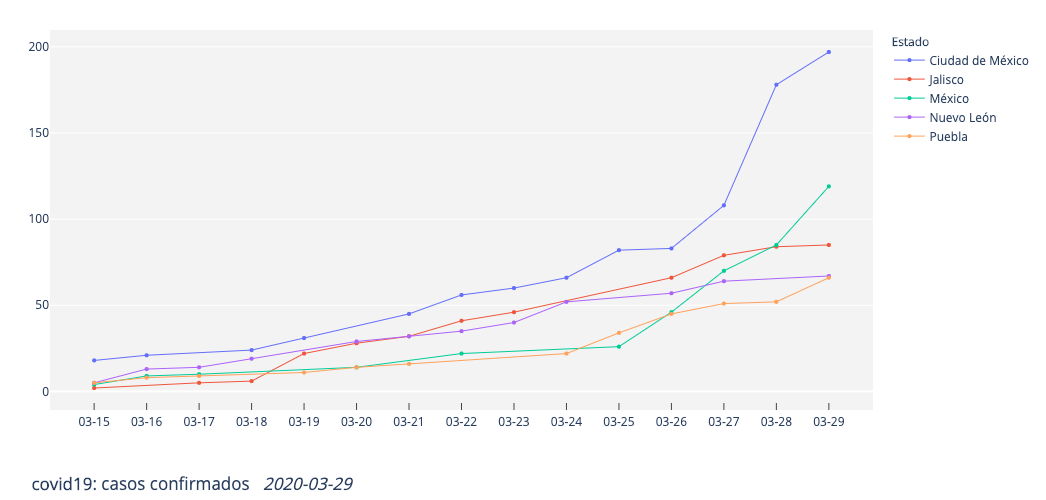

In [143]:
fig = px.scatter(plottop, x="fecha_caso_nuevo", y="count", color="estado", hover_data=['count'])
for i in range(0,len(fig.data)):
    fig.data[i].update(mode='markers+lines',
                       marker=dict(size=4),
                       line=dict(width=1))

fig.update_layout(title={'text': '<b>covid19</b>: casos confirmados   <i>{}</i>'.format(recent_day),
                         'x': 0.03,
                         'y': 0.02},
                  width=1000,
                  height=500,
                  margin={"r":30,"t":30,"l":50,"b":90},
                  autosize=False,
                  plot_bgcolor='rgb(243, 243, 243)',
                  xaxis=dict(showline=True,
                             showgrid=False,
                             linewidth=2,
                             type='date',
                             autorange=True,
                             dtick='2000-01-01',
                             tickformat='%m-%d',
                             ticks='inside',
                             ticklen=7,
                             title=None),
                  yaxis=dict(autorange=True,
                             title=None),
                 legend_title='<b>Estado</b>'
                 )
fig.show()

In [144]:
plotly_url = py.plot(fig, filename = '20200329_growth-per_state', auto_open=True)

In [145]:
plotly_url

'https://plotly.com/~nataquinones/854/'

In [147]:
df3_cum.to_csv('../datos/tablas_procesadas/20200329_acumulados-estado.tsv',
               sep='\t',
               index=None)